In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
def flux(c, u):
    if c >= 0:
        F = c * u[:-1]
    else:
        F = c * u[1:]
    return F

In [49]:
def linearconv(nx, c):
    dx = 2 / (nx - 1)
    nt = 20
    sigma = 1
    x = np.linspace(0, 2, nx)
    u = np.ones(nx)
    lbound = np.where(x >= 0.5)
    ubound = np.where(x <= 1)
    u[np.intersect1d(lbound, ubound)] = 2
    un = np.ones(nx)
    dt = sigma * dx / abs(c)
    for n in range(nt):
        un = u.copy()
        F = flux(c, u)
        u[1:-1] = un[1:-1] - dt / dx * (F[1:] - F[:-1])
        u[0] = 1
        u[-1] = u[-2]
    plt.plot(x, u)
    plt.plot(0.0, 2.5)
        

Wall time: 41.4 ms


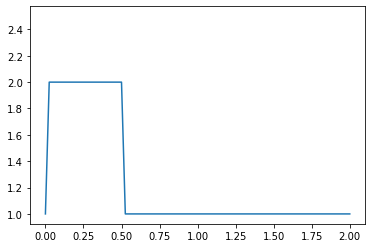

In [50]:
%%time
linearconv(81, -1)